# Spaceship Titanic Practice

Этот набор данных был искусственно создан командой Kaggle как учебный. Он представляет из себя футуристическую копию оригинального набора данных Титаника, только вместо столкновения с айсбергом здесь "столкновение с пространственно-временной аномалией". Результатом этого столкновения стало перемещение части пассажиров в другое измерение.

Необходимо определить, какие пассажиры были перемещены, используя имеющуюся информацию о пассажирах и параметр <code>Transported</code>, показывающий был этот пассажир перемещен или нет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Описание колонок: 
<ul>
    <li><code>PassengerId</code> - Уникальный Id для каждого пассажира. Каждый Id имеет форму gggg_pp где gggg указывает группу, с которой путешествует пассажир, а pp – это их номер в группе. Люди в группе чаще всего являются семьей, но не всегда.</li>
<li><code>HomePlanet</code> - Планета, которую покинул пассажир, обычно это планета из постоянного пребывания.</li>
<li><code>CryoSleep</code> - Указывает, решил ли пассажир быть помещенным в криосон на время рейса. Пассажиры в криосне ограничены в своих каютах.</li>
<li><code>Cabin</code> - Номер кабины, в которой остановился пассажир. Имеет форму палуба/номер/сторона, где сторона может быть P для Левого борта или S для Правого борта.</li>
<li><code>Destination</code> - Планета, на которой пассажир высаживается.</li>
<li><code>Age</code> - Возраст пассажира.</li>
<li><code>VIP</code> - Указывает, платил ли пассажир за специальные VIP услуги на время путешествия.</li>
<li><code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Сумма, которую пассажир выставил на каждый из многочисленных роскошных удобств космического корабля "Титаник".</li>
<li><code>Name</code> - Имя и фамилия пассажира.</li>
<li><code>Transported</code> - Показывает, был ли пассажир транспортирован в другое измерение. Это целевая переменная, колонка, которую необходимо предсказать.</li>
</ul>

---

# Общие наблюдения тренировочного набора:
* Имеется **8693 записи**, каждая из которых содержит по **14 колонок**; 7 из которых типа *object*, 6 типа *float* и одна целевая переменная <code>Transported</code> типа *bool*.
* Пропущено примерно по **2% значений**, в среднем 166 пропущенных значений в колонке, максимальное количество пропущенных значений находится в <code>CryoSleep</code>. <code>PassengerId</code> и <code>Transported</code> не имеют пропущенных значений.
* Набор содержит сильные выбросы в колонках <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code>. **Среднее средних значений** в колоках **295**, в то время как **среднее максимальное 22834**

In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Информация

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Проверка типов

По хеду датасета строкой выше видно, что все числа в колонках с типом float по сути целочисленные. 
<p>Проверим так ли это.</p>


In [4]:
for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    print('Колонка {0}: \t{1}'.format(col, train_data[col].apply(float.is_integer).all()))

Колонка Age: 	False
Колонка RoomService: 	False
Колонка FoodCourt: 	False
Колонка ShoppingMall: 	False
Колонка Spa: 	False
Колонка VRDeck: 	False


Нет, к сожалению, не так...

### Пропущенные значения

В выводе функции info() было видно, что в некоторых колонках имеются пропущенные значения. Проверим, насколько много в процентном соотношении пропущенных элементов

In [5]:
(train_data.isna().sum() / train_data.shape[0]) * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

Все не так плохо, всего примерно по 2% пропущенных значений в каждой из колонок кроме разве что в колонке с ID пассажиров и целевой переменной.
<p>Наибольшее число пропущенных значений в колонке <code>CryoSleep</code>.</p>

In [6]:
print('Среднее число пропущенных значений: ',train_data.isna().sum().mean())

Среднее число пропущенных значений:  166.0


In [7]:
print('Транспортировано: ', train_data[train_data['Transported'] == True].shape[0])
print('Не транспортировано: ', train_data[train_data['Transported'] == False].shape[0])

Транспортировано:  4378
Не транспортировано:  4315


### Базовая статистическая информация

In [8]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
print('Среднее средних трат пассажиров: ', np.mean(train_data.loc[:, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()))
print('Среднее максимальных трат пассажиров: ', np.mean(train_data.loc[:, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].max()))

Среднее средних трат пассажиров:  294.49751182020174
Среднее максимальных трат пассажиров:  22834.6


Здесь видно, как в столбцах <code>RoomService FoodCourt ShoppingMall Spa VRDeck</code> имеются сильные выбросы максимальных значений.

# Общие наблюдения тестового набора
* Тестовый набор содержит 4277 записей, содержащих 13 колонок (отсутствует целевая колонка, которую необходимо предсказать)
* Соотношение пропущенных значений примерно такое же, как и для тренировочного набора – 2%, в среднем 86 пропущенных значений в колонке
* Тестовый набор, как и тренировочный, тоже содержит сильные выбросы по колонкам трат

In [10]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [12]:
print('Среднее количество пропущенных значений: {0}\n'.format(test_data.isna().sum().mean()))
(test_data.isna().sum() / test_data.shape[0]) * 100

Среднее количество пропущенных значений: 85.92307692307692



PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

In [13]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


---

In [14]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Разведочный анализ

### PassengerID
На всякий случай проверим, все ли пассажиры имеют уникальный ID, разделив каличество уникальных значений на общее количество записей.

In [15]:
train_data.PassengerId.nunique() / train_data.shape[0]

1.0

Так как в описании набора данных было указано, что Id пассажира состоит из номера группы и номера пассажира в этой группе, выделим номер группы в отдельный столбец и посмотрим на распределение.

In [16]:
groups = []

for pass_id in train_data.PassengerId:
    groups.append(pass_id.split(sep='_')[0])
    
train_data['Group'] = groups

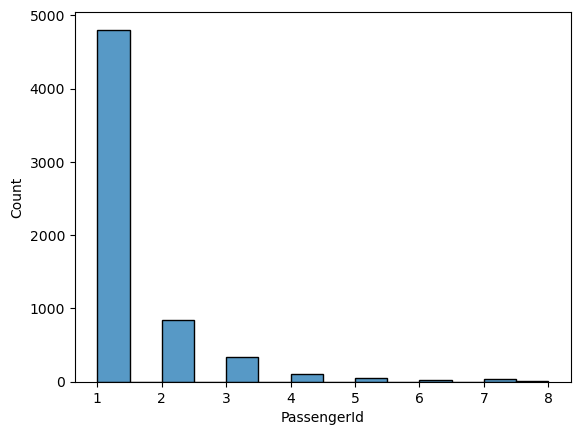

In [17]:
sns.histplot(train_data.groupby('Group').PassengerId.count());

### CryoSleep

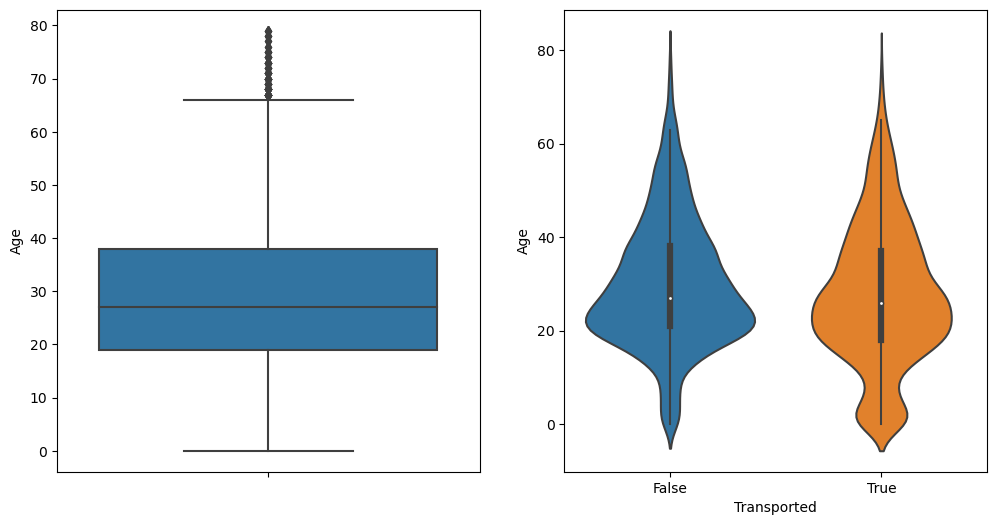

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.boxplot(ax=axes[0], data=train_data, y='Age')
sns.violinplot(ax=axes[1], data=train_data, x='Transported', y='Age');

Спящие и траспортированные: 2483, неспящие и нетранспортированные: 3650



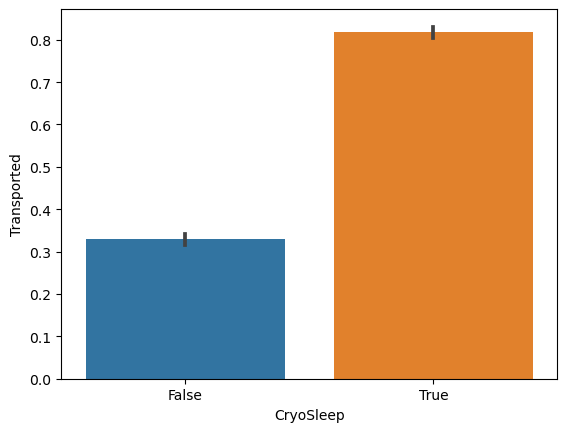

In [19]:
sns.barplot(train_data, x='CryoSleep', y='Transported');
print('Спящие и траспортированные: {0}, неспящие и нетранспортированные: {1}\n'.format(train_data[(train_data.CryoSleep == True) & (train_data.Transported == True)].shape[0], 
                                                                                     train_data[(train_data.CryoSleep == False) & (train_data.Transported == False)].shape[0]))

### HomePlanet

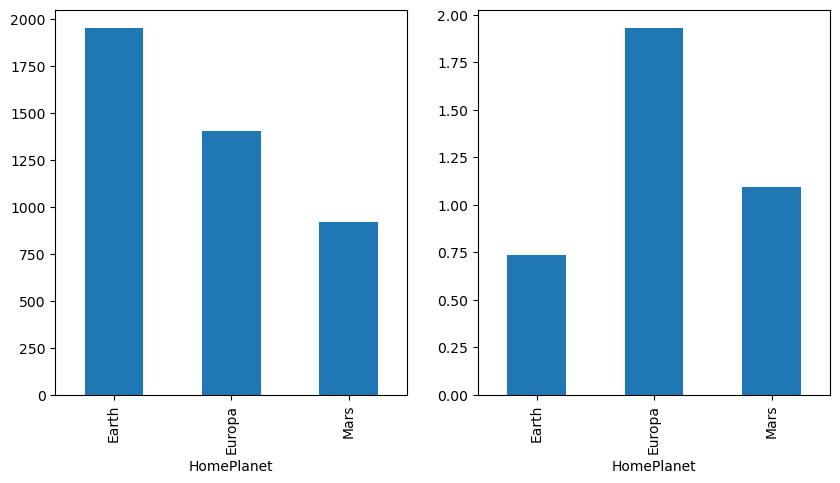

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
train_data[train_data.Transported == True].groupby('HomePlanet').Transported.count().plot(kind='bar', ax=ax[0])

planets_transported_count = train_data[train_data.Transported == True].groupby('HomePlanet').Transported.count()
planets_not_transported_count = train_data[train_data.Transported == False].groupby('HomePlanet').Transported.count()
(planets_transported_count / planets_not_transported_count).plot(kind='bar', ax=ax[1]);

### Age

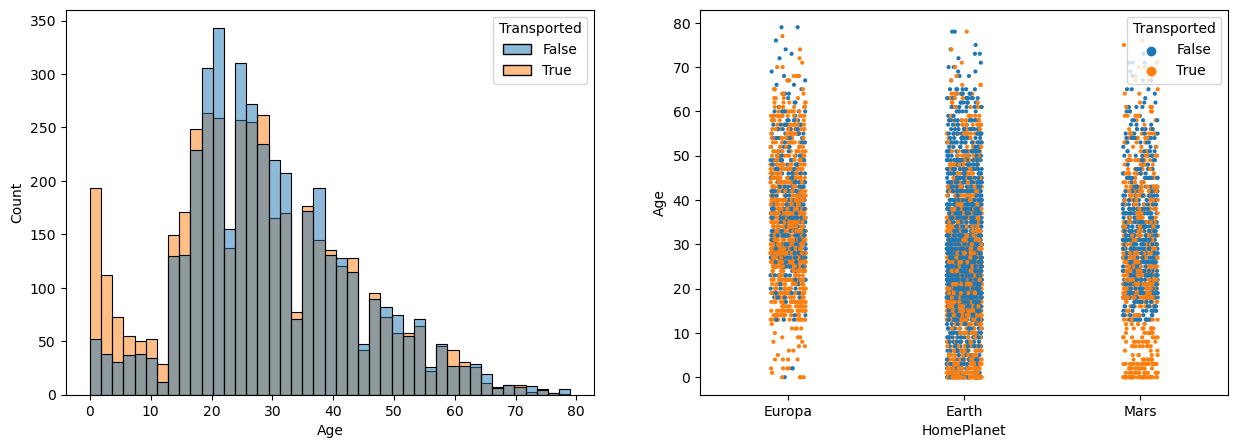

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(train_data, x='Age', hue='Transported', ax=ax[0])
sns.stripplot(data=train_data.dropna().copy(), x='HomePlanet', y='Age', hue='Transported', size=3, ax=ax[1]);

In [22]:
print('Минимальный возраст нетелепортированных детей с Марса: %d'% train_data[(train_data.HomePlanet == 'Mars') & (train_data.Transported == False)].Age.min())

Минимальный возраст нетелепортированных детей с Марса: 13


По всей видимости дети младше 13 лет с Марса абсолютно все были транспортированы, как и большинство детей с Европы, в отличии от детей с Земли.

### Cabin

Выделим в отдельный столбец стороны бортов, в ккоторых располагаются кабины пассажиров.

In [23]:
cabin_side = []
for el in train_data.Cabin:
    if np.nan_to_num(el) != 0.0:
        cabin_side.append(el[-1])
    else:
        cabin_side.append(np.nan)
    
train_data['CabinSide'] = cabin_side

In [24]:
train_data.CabinSide.value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

В правой стороне корабля шанс быть транспортированным немного выше, но там и на 80 человек больше.

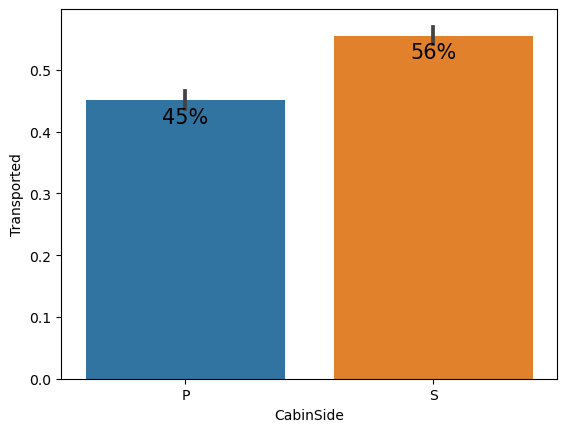

In [25]:
fig = sns.barplot(data=train_data, x='CabinSide', y='Transported');
for bar in fig.patches:
    fig.annotate(format(bar.get_height(), '.0%'), 
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Выделим теперь палубу в отдельную колонку и посмотрим на ее распределение.

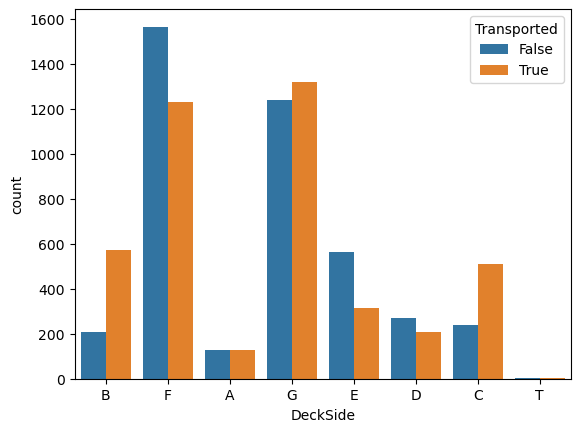

In [26]:
deck_side = []
for el in train_data.Cabin:
    if np.nan_to_num(el) != 0.0:
        deck_side.append(el[0])
    else:
        deck_side.append(np.nan)
    
train_data['DeckSide'] = deck_side
sns.countplot(data=train_data, x='DeckSide', hue='Transported');

### Destination

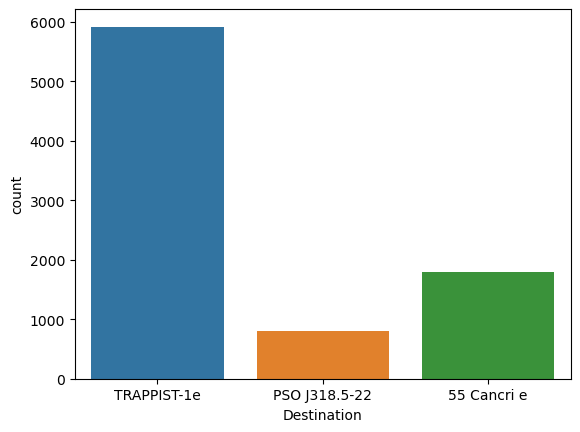

In [27]:
sns.countplot(data=train_data, x='Destination');

### VIP

<AxesSubplot:xlabel='VIP', ylabel='count'>

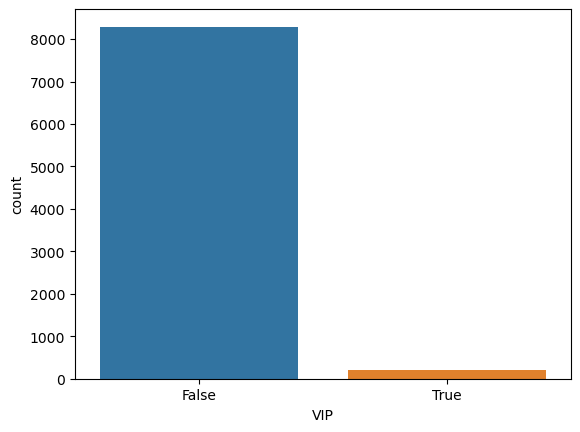

In [28]:
sns.countplot(data=train_data, x='VIP')

### FoodCourt, Spa, VRDeck, RoomService

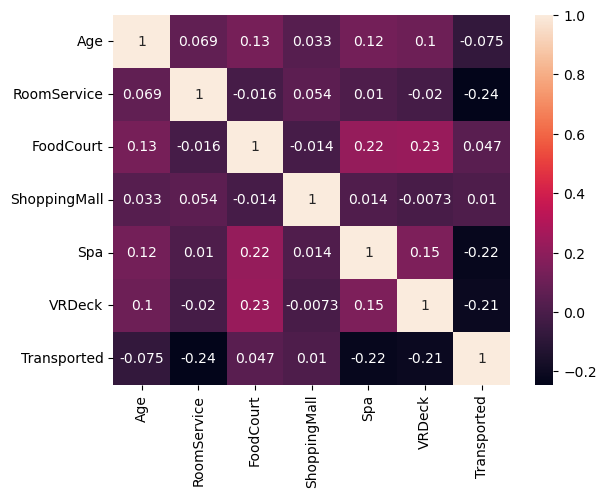

In [29]:
sns.heatmap(train_data.corr(), annot=True);

По матрице корреляций видно, что между суммой, потраченной на фудкорте и суммами, потраченными на СПА/VRПалубу есть небольшая положительная корреляция. Логично, что те пассажиры, которые тратят больше денег на еду, готовы так же больше тратить и на развлечения. К сожалению, эта информация никак не продвигает нас к цели.
<p>Также, замечена небольшая отрицательная корреляция между доп. тратами на судне (Обслуживание в номере, СПА и VRПалуба) и шансом на телепортацию.</p>

<AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>

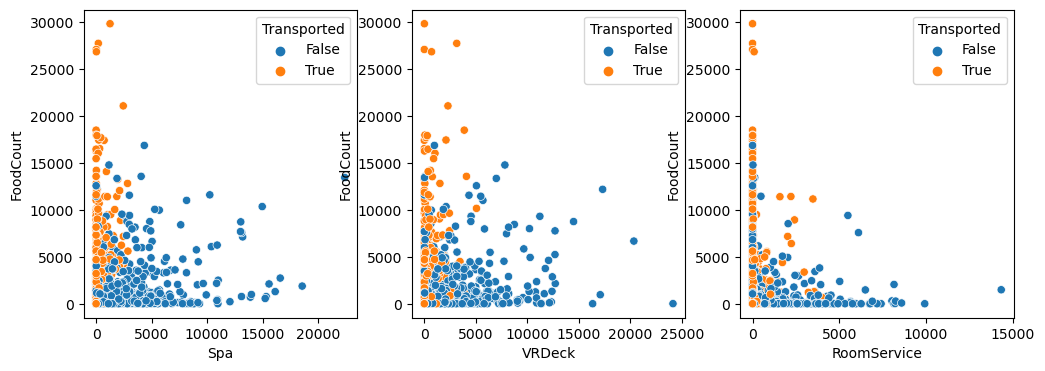

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4));
sns.scatterplot(ax=axes[0], data=train_data, x='Spa', y='FoodCourt', hue='Transported')
sns.scatterplot(ax=axes[1], data=train_data, x='VRDeck', y='FoodCourt', hue='Transported')
sns.scatterplot(ax=axes[2], data=train_data, x='RoomService', y='FoodCourt', hue='Transported')

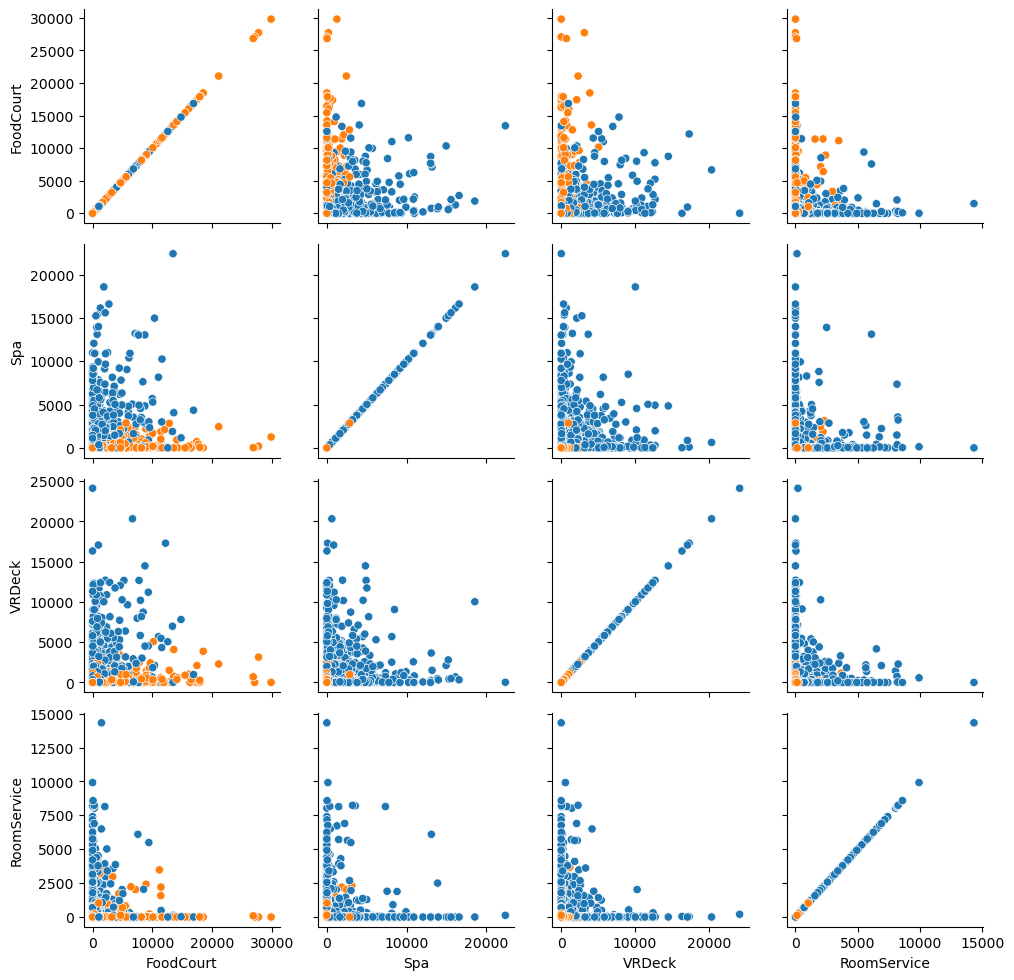

In [31]:
multax = sns.PairGrid(data=train_data.loc[:, ['FoodCourt', 'Spa', 'VRDeck', 'RoomService', 'Transported']], hue='Transported')
multax.map(sns.scatterplot);

При первом взгляде кажется, что имеется четкое разделение между тратами и шансом на транспортацию. Но, вспоминая базовою статистическую информацию о датасете, у нас есть сильные выбросы и среднее по тратам примерно равное 280. Поэтому для повышения информативности графика добавим к осям графики распределения значений:

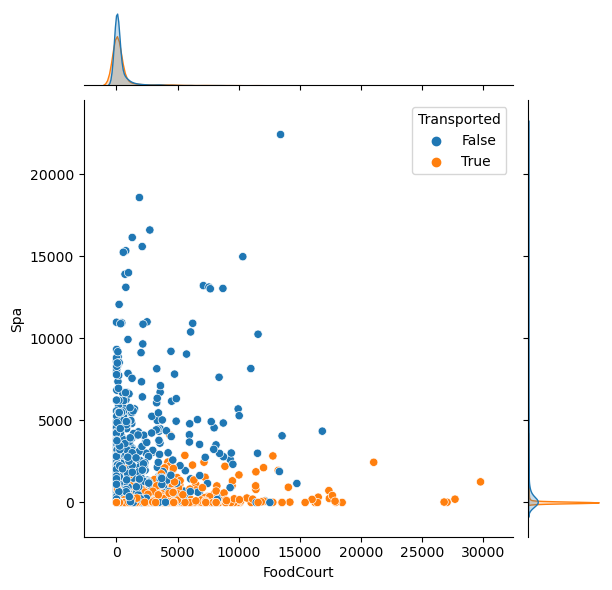

In [32]:
sns.jointplot(data=train_data, x="FoodCourt", y="Spa", hue="Transported");

Возьмем 95% этих данных, чтобы убрать выбросы, и посмотрим на распределение поближе:

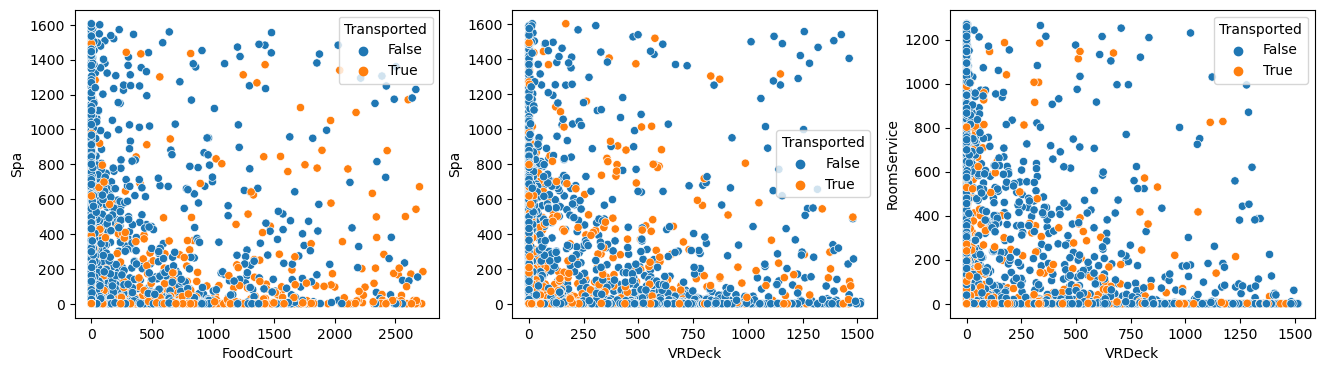

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4));
quant_spa = float(train_data.Spa.quantile([0.95]))
quant_food = float(train_data.FoodCourt.quantile([0.95]))
quant_vrdeck = float(train_data.VRDeck.quantile([0.95]))
quant_roomserv = float(train_data.RoomService.quantile([0.95]))

quant_spa_data = train_data[train_data.Spa <= quant_spa].Spa
quant_food_data = train_data[train_data.FoodCourt <= quant_food].FoodCourt
quant_vrdeck_data = train_data[train_data.VRDeck <= quant_vrdeck].VRDeck
quant_roomserv_data = train_data[train_data.RoomService <= quant_roomserv].RoomService

sns.scatterplot(ax=axes[0], x=quant_food_data, y=quant_spa_data, hue=train_data.Transported);
sns.scatterplot(ax=axes[1], x=quant_vrdeck_data, y=quant_spa_data, hue=train_data.Transported);
sns.scatterplot(ax=axes[2], x=quant_vrdeck_data, y=quant_roomserv_data, hue=train_data.Transported);

Здесь уже не наблюдается такого четкого разделения на Транспортирован/Не транспортирован. 

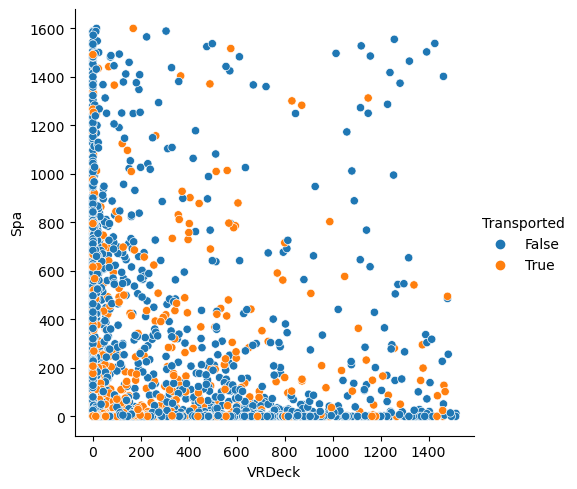

In [34]:
quant_vrdeck = float(train_data.VRDeck.quantile([0.95]))
quant_vrdeck_data = train_data[train_data.VRDeck <= quant_vrdeck].VRDeck

sns.relplot(x=quant_vrdeck_data, y=quant_spa_data, hue=train_data.Transported);

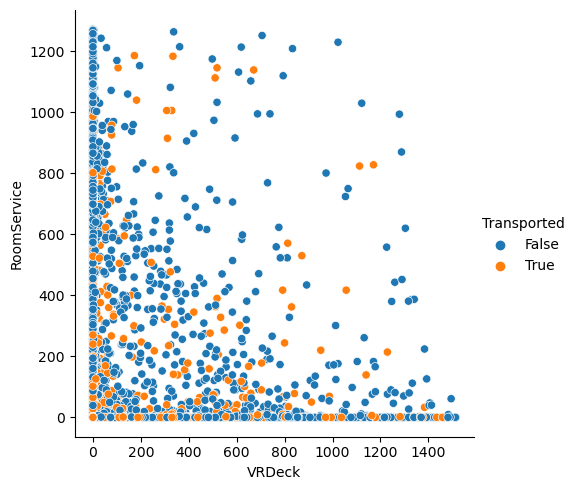

In [35]:
quant_roomserv = float(train_data.RoomService.quantile([0.95]))
quant_roomserv_data = train_data[train_data.RoomService <= quant_roomserv].RoomService

sns.relplot(x=quant_vrdeck_data, y=quant_roomserv_data, hue=train_data.Transported);

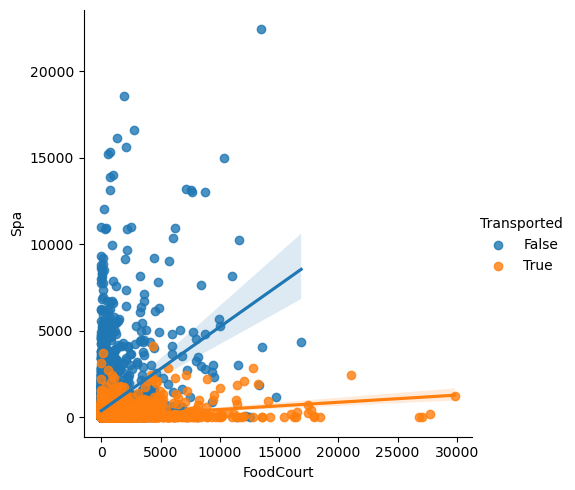

In [36]:
sns.lmplot(data=train_data, x='FoodCourt', y='Spa', hue='Transported');

### TotalBill (сумма трат)

Посмотрим, может как-то получится лучше их сегментировать если сложить все траты по пассажиру и выделить их в общий столбец.

In [37]:
total_bill = []

for passenger in train_data.loc[:, ['FoodCourt', 'Spa', 'VRDeck', 'RoomService', 'ShoppingMall']
                               ].fillna(0).values:
    total_bill.append(sum(passenger))

train_data['TotalBill'] = total_bill

<AxesSubplot:xlabel='TotalBill', ylabel='Count'>

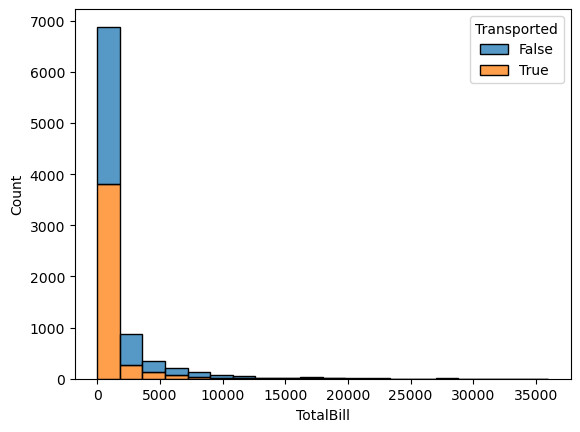

In [38]:
sns.histplot(data=train_data, x='TotalBill', bins=20, multiple="stack", hue='Transported')

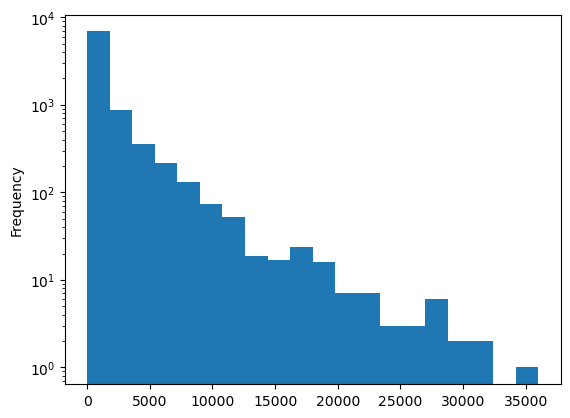

In [39]:
train_data.TotalBill.plot.hist(bins=20, logy=True);

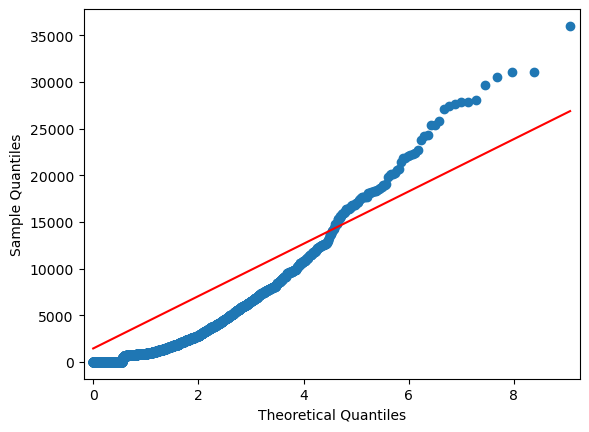

In [40]:
import statsmodels.api as sm
import scipy
sm.qqplot(train_data.TotalBill, dist=scipy.stats.distributions.expon, line='s');

In [41]:
print(train_data.TotalBill.mean())
print(train_data.TotalBill.median())
print(train_data.TotalBill.std())

1440.8663292304152
716.0
2803.045693772285


### Name

In [42]:
names = []

for full_name in train_data.Name.values:
    names.append(str(full_name).split()[0])
    
pd.Series(names).nunique()

2707

### Transported

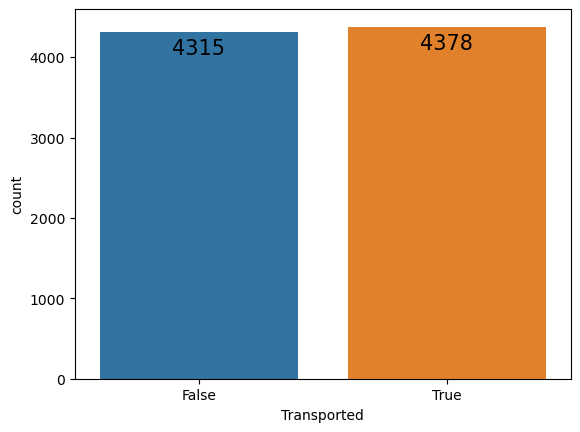

In [43]:
fig = sns.countplot(data=train_data, x='Transported');
for bar in fig.patches:
    fig.annotate(format(bar.get_height(), 'g'), 
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Эсперимент с моделью

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Отбираем отдельно колонки с числовыми и отдельно с категориальными значениями. Пропущенные числовые значения заменяем нулем. Записи с пропущеными значениями в категориальных колонках удаляем, для их восстановления придется потратить слишком много сил.

In [45]:
# missing_cols = [col for col in train_data.columns if train_data[col].isnull().any()]

num_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]
# num_cols = ['Age', 'TotalBill']
# num_cols.remove('TotalBill')
cat_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
cat_cols.remove('PassengerId')

oh_cat_cols = [col for col in cat_cols if train_data[col].nunique() < 6]
ord_cat_cols = [col for col in cat_cols if train_data[col].nunique() > 5]

train_data_num = train_data[num_cols].fillna(0)
train_data_num = pd.concat([train_data_num, train_data[cat_cols], train_data.Transported], axis=1)
train_data_no_missing = train_data_num.dropna()

Кодируем категориальные значения и соединяем отобранные колонки в одну таблицу Х.

In [46]:
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
ord_encoder = OrdinalEncoder()

train_cat_oh = pd.DataFrame(oh_encoder.fit_transform(train_data_no_missing[oh_cat_cols]))
train_cat_ord = pd.DataFrame(ord_encoder.fit_transform(train_data_no_missing[ord_cat_cols]))

train_cat_oh.index = train_data_no_missing.index
train_cat_ord.index = train_data_no_missing.index

train_data_no_missing_num = train_data_no_missing[num_cols]
X = pd.concat([train_cat_oh, train_cat_ord, train_data_no_missing_num], axis=1)

X.columns = X.columns.astype(str)
y = train_data_no_missing.Transported

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8029100529100529

Для ненастроенных гиперпараметров получается очень даже неплохой результат – 80% правильных предсказаний на тренеровочных данных.

Чуть позже сделаю препроцессинг с помощью пайплайнов и тогда уже проведу оценку на тестовых данных.